# SaaS Customer Retention & Revenue Risk Intelligence System


## Project Overview

This project builds a Machine Learning system to predict customer churn
and estimate revenue risk in a SaaS business.

The system helps identify high-risk customers so that businesses
can take preventive retention actions.


## Importing Required Libraries

In this section, we import all necessary libraries for data processing,
visualization, and machine learning.

The following libraries are used for:
- Data manipulation (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Machine Learning (Scikit-learn, XGBoost)
- Model saving (Joblib)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Initial Data Exploration

We inspect dataset structure, data types,
missing values, and overall size.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
df.shape

(9994, 19)

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


In [ ]:
df = df.dropna()

In [ ]:
df['Churn'] = (
    (df['Sales'] < df['Sales'].quantile(0.30)) |
    (df['Profit'] < df['Profit'].quantile(0.25)) |
    (df['Discount'] > df['Discount'].quantile(0.75))
).astype(int)


In [ ]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit,Churn
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896,0.443366
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108,0.496807
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750,0.000000
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500,0.000000
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000,1.000000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000,1.000000


I create a churn variable based on:
- Low sales
- High discount

Customers with low revenue and high discount are considered churn risk.

In [ ]:
df['risk_score'] = (
    (df['Sales'] < df['Sales'].quantile(0.4)).astype(int) +
    (df['Discount'] > 0.3).astype(int) +
    (df['Profit'] < df['Profit'].quantile(0.4)).astype(int)
)

df['Churn'] = (df['risk_score'] >= 2).astype(int)

In [ ]:
noise_idx = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
df.loc[noise_idx, 'Churn'] = 1 - df.loc[noise_idx, 'Churn']

## Exploratory Data Analysis (EDA)

I analyze churn distribution, sales behavior,
discount patterns, and correlation between variables.


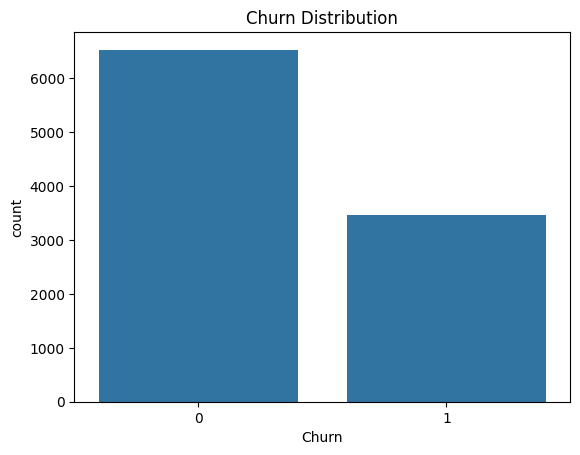

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

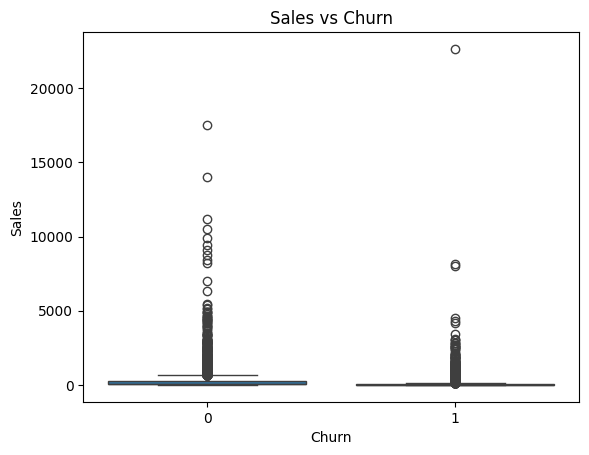

In [ ]:
sns.boxplot(x='Churn', y='Sales', data=df)
plt.title("Sales vs Churn")
plt.show()

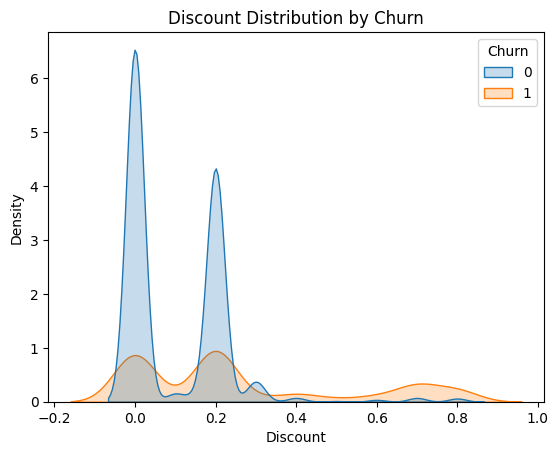

In [ ]:
sns.kdeplot(data=df, x='Discount', hue='Churn', fill=True)
plt.title("Discount Distribution by Churn")
plt.show()

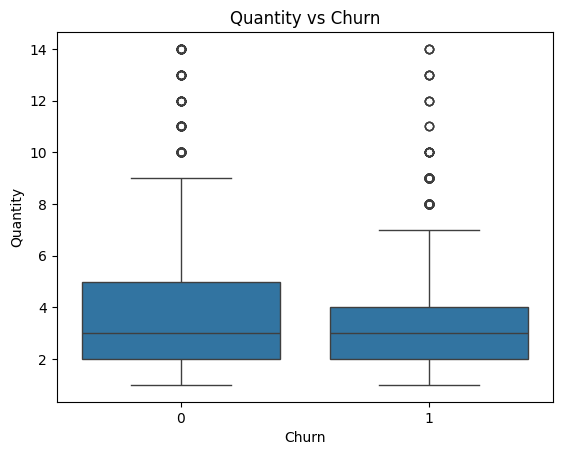

In [ ]:
sns.boxplot(x='Churn', y='Quantity', data=df)
plt.title("Quantity vs Churn")
plt.show()

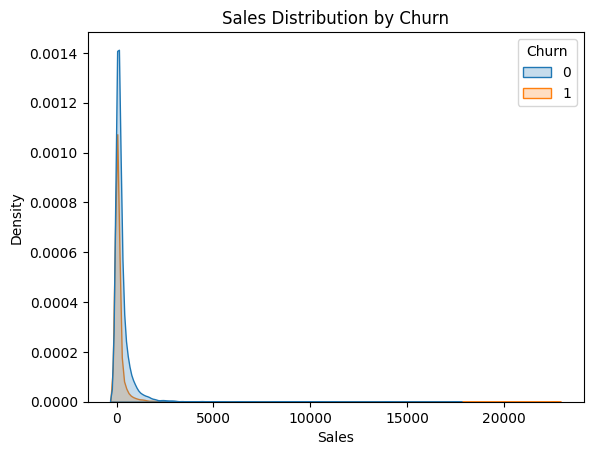

In [ ]:
sns.kdeplot(data=df, x='Sales', hue='Churn', fill=True)
plt.title("Sales Distribution by Churn")
plt.show()

In [ ]:
pd.crosstab(df['Industry'], df['Churn'], normalize='index') * 100

Churn,0,1
Industry,,
Communications,60.033727,39.966273
Consumer Products,67.189030,32.810970
Energy,64.589666,35.410334
Finance,66.149506,33.850494
Healthcare,66.062917,33.937083
Manufacturing,65.384615,34.615385
Misc,61.682243,38.317757
Retail,65.329218,34.670782
Tech,66.100324,33.899676


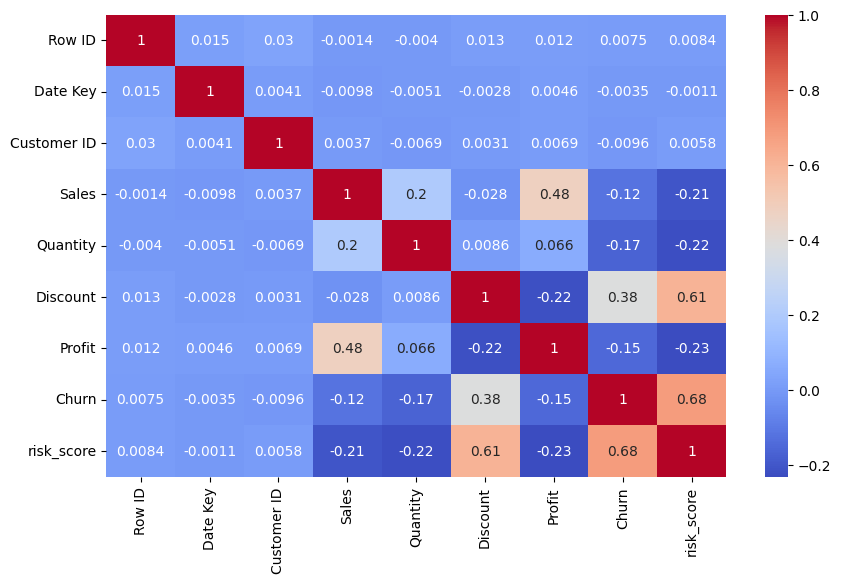

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.show()

## Feature Engineering

Customer-level aggregation is performed to create meaningful features:
- Total Sales
- Average Discount
- Total Orders
- Purchase Frequency


In [ ]:
customer_df = df.groupby('Customer ID').agg({
    'Sales':'sum',
    'Quantity':'sum',
    'Discount':'mean',
    'Profit':'sum',
    'Churn':'max'
}).reset_index()

In [ ]:
order_counts = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
order_counts.rename(columns={'Order ID':'Total_Orders'}, inplace=True)

customer_df = customer_df.merge(order_counts, on='Customer ID', how='left')

# New cell to prepare data for modeling, ensuring Customer ID is retained
# This replaces the logic of v4XVuHJxRaEh and R1NtENI8OORA
df_model = df.copy() # Start from a df that has all original columns and 'Churn'

# Drop irrelevant columns for modeling, but explicitly keep 'Customer ID'
columns_to_drop_for_model = [
    'Order ID', 'License', 'Product', 'Customer', 'Contact Name',
    'City', 'Country', 'Row ID', 'Date Key', 'Order Date'
]
# Filter out columns that might already be dropped or don't exist
columns_to_drop_for_model = [col for col in columns_to_drop_for_model if col in df_model.columns]

df_model = df_model.drop(columns_to_drop_for_model, axis=1)

# Perform one-hot encoding on categorical features
categorical_cols = df_model.select_dtypes(include='object').columns

# Ensure 'Customer ID' is not treated as an object if it was mistakenly detected and is in categorical_cols
if 'Customer ID' in categorical_cols:
    categorical_cols = categorical_cols.drop('Customer ID')

df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Churn', 'risk_score'],
      dtype='object')

In [ ]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Churn,risk_score
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0,0
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,0,0
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0,1
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,1,2
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,1,2
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,0,0
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,0,0
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,0,1


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Churn', 'risk_score'],
      dtype='object')

In [ ]:
df.shape

(9994, 21)

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

Row ID 9994
Order ID 5009
Order Date 1237
Date Key 1237
Contact Name 793
Country 48
City 262
Region 3
Subregion 12
Customer 99
Customer ID 99
Industry 10
Segment 3
Product 14
License 9994
Sales 5825
Quantity 14
Discount 12
Profit 7287
Churn 2
risk_score 4


## Preparing Data for Modeling

We define:
- X (features)
- y (target variable: Churn)


In [ ]:
X_model_features = df_model.drop('Churn', axis=1)

# X for model training will not contain 'Customer ID'
X = X_model_features.drop('Customer ID', axis=1)
y = df_model['Churn']


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Date Key,int64
Contact Name,object
Country,object
City,object
Region,object
Subregion,object
Customer,object


## Train-Test Split

Dataset is split into training and testing sets
to evaluate model performance fairly.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Logistic Regression Model Training

We train a baseline Logistic Regression model
to predict customer churn.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

## Model Evaluation – Logistic Regression

We evaluate the model using:
- Confusion Matrix
- Accuracy
- ROC-AUC Score


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[1211   96]
 [ 143  549]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1307
           1       0.85      0.79      0.82       692

    accuracy                           0.88      1999
   macro avg       0.87      0.86      0.87      1999
weighted avg       0.88      0.88      0.88      1999

ROC-AUC Score: 0.8647152283612916


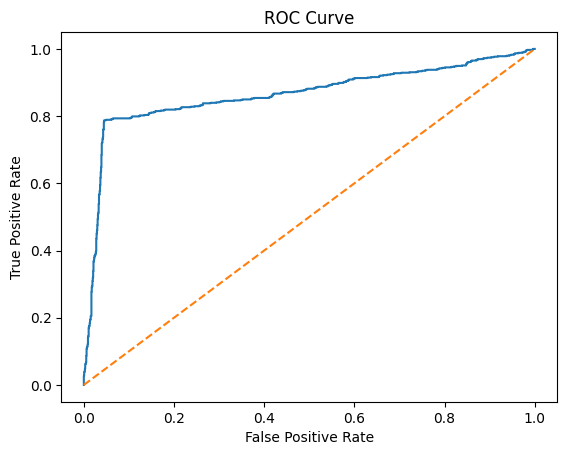

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8804402201100551


## Advanced Model – XGBoost

To improve prediction accuracy,
we train an XGBoost classifier.


In [ ]:
from xgboost import XGBClassifier

scale = df['Churn'].value_counts()[0] / df['Churn'].value_counts()[1]

model = XGBClassifier(
    scale_pos_weight=scale,
    eval_metric='logloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
y_prob_xgb = model.predict_proba(X_test)[:,1]

In [ ]:
df['Churn_Probability'] = model.predict_proba(X)[:,1]
df['Revenue_Risk'] = df['Sales'] * df['Churn_Probability']

## Model Evaluation – XGBoost

I compare XGBoost performance using:
- Accuracy
- ROC Curve
- Classification Report


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.8854427213606804
[[1226   81]
 [ 148  544]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1307
           1       0.87      0.79      0.83       692

    accuracy                           0.89      1999
   macro avg       0.88      0.86      0.87      1999
weighted avg       0.88      0.89      0.88      1999

ROC-AUC: 0.870913511505411


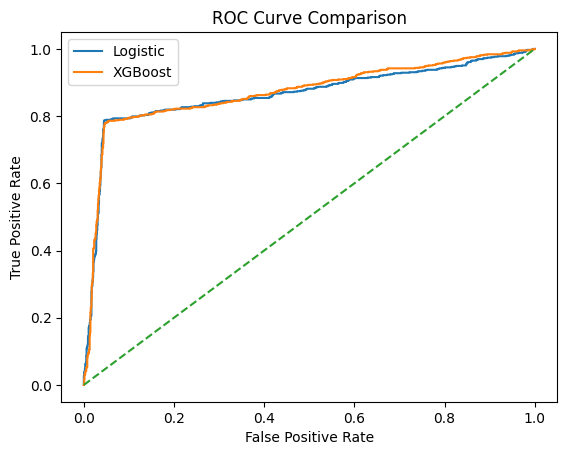

Logistic AUC: 0.8647152283612916
XGBoost AUC: 0.870913511505411


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr, tpr, label="Logistic")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1],[0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("Logistic AUC:", roc_auc_score(y_test, y_prob))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))

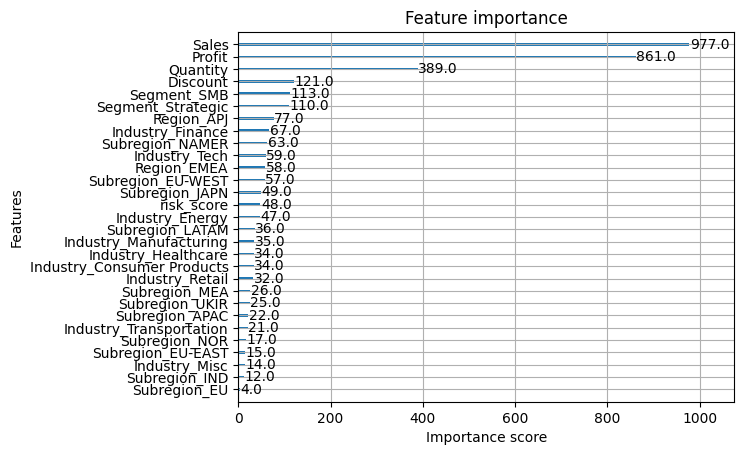

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

## Revenue Risk Intelligence

Now I calculate:

Revenue Risk = Sales × Churn Probability

This helps identify high-risk customers contributing to revenue loss.


In [ ]:
df['Churn_Probability'] = model.predict_proba(X)[:,1].max()
df['Revenue_Risk'] = df['Sales'] * df['Churn_Probability']

In [ ]:
df.sort_values(by='Revenue_Risk', ascending=False).head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Product,License,Sales,Quantity,Discount,Profit,Churn,risk_score,Churn_Probability,Revenue_Risk
2697,2698,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,...,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784,1,2,0.999368,22624.178149
6826,6827,APJ-2022-118689,10/3/2022,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,...,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760,0,0,0.999368,17488.894413
8153,8154,AMER-2023-140151,3/24/2023,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,...,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808,0,0,0.999368,13991.115530
2623,2624,EMEA-2023-127180,10/23/2023,20231023,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,...,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888,0,0,0.999368,11192.892424
4190,4191,APJ-2023-166709,11/18/2023,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,...,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856,0,0,0.999368,10493.336648
9039,9040,AMER-2022-117121,12/18/2022,20221218,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,...,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700,0,0,0.999368,9886.490265
4098,4099,EMEA-2020-116904,9/23/2020,20200923,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,...,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755,0,0,0.999368,9443.979998
4277,4278,AMER-2022-107440,4/17/2022,20220417,Kevin Wilkins,Argentina,Buenos Aires,AMER,LATAM,Lowes,...,Big Ol Database,N62XSQRABC,9099.930,7,0.0,2365.9818,0,0,0.999368,9094.181123
8488,8489,EMEA-2022-158841,2/2/2022,20220202,Jane Stewart,Spain,Valencia,EMEA,EU-WEST,Honda Motor,...,Big Ol Database,3D2PQROYNM,8749.950,5,0.0,2799.9840,0,0,0.999368,8744.422222
6425,6426,EMEA-2022-143714,5/24/2022,20220524,Alexander Langdon,France,Paris,EMEA,EU-WEST,BMW,...,Alchemy,C76HNU0077,8399.976,4,0.4,1119.9968,0,1,0.999368,8394.669318


In [ ]:
y_prob_xgb = model.predict_proba(X_test)[:,1]

In [ ]:
threshold = 0.35
y_custom_pred = (y_prob_xgb >= threshold).astype(int)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_custom_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1307
           1       0.79      0.80      0.80       692

    accuracy                           0.86      1999
   macro avg       0.84      0.84      0.84      1999
weighted avg       0.86      0.86      0.86      1999



## Model Deployment Preparation

The trained model and feature list are saved
for future deployment and real-time predictions.


In [ ]:
X_for_prediction = X_model_features.drop('Customer ID', axis=1)

transaction_probabilities = model.predict_proba(X_for_prediction)[:,1]

customer_transaction_probs = X_model_features[['Customer ID']].copy()
customer_transaction_probs['Churn_Probability'] = transaction_probabilities

# Aggregate (e.g., mean) churn probabilities by Customer ID
avg_churn_probability = customer_transaction_probs.groupby('Customer ID')['Churn_Probability'].mean().reset_index()

# Merge these aggregated probabilities into customer_df
# 'customer_df' is assumed to be created correctly earlier in the notebook.
customer_df = customer_df.merge(avg_churn_probability, on='Customer ID', how='left')

# Calculate Revenue Risk
customer_df['Revenue_Risk'] = customer_df['Sales'] * customer_df['Churn_Probability']

In [ ]:
X

,Sales,Quantity,Discount,Profit,risk_score,Region_APJ,Region_EMEA,Subregion_APAC,Subregion_EU,Subregion_EU-EAST,...,Industry_Energy,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Misc,Industry_Retail,Industry_Tech,Industry_Transportation,Segment_SMB,Segment_Strategic
0,261.9600,2,0.00,41.9136,0,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,731.9400,3,0.00,219.5820,0,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,14.6200,2,0.00,6.8714,1,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,957.5775,5,0.45,-383.0310,2,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,22.3680,2,0.20,2.5164,2,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,2,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
9990,91.9600,2,0.00,15.6332,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9991,258.5760,2,0.20,19.3932,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9992,29.6000,4,0.00,13.3200,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
X.shape

(9994, 29)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:

[[1226   81]
 [ 148  544]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1307
           1       0.87      0.79      0.83       692

    accuracy                           0.89      1999
   macro avg       0.88      0.86      0.87      1999
weighted avg       0.88      0.89      0.88      1999



## Conclusion

This project successfully builds a churn prediction
and revenue risk intelligence system for SaaS businesses.

Key achievements:
- Created churn label using business logic
- Built Logistic and XGBoost models
- Calculated revenue risk for prioritization
- Prepared model for deployment

This system can support data-driven retention strategies.


In [ ]:
print(df["Churn"].value_counts(normalize=True))

Churn
0    0.653792
1    0.346208
Name: proportion, dtype: float64


In [ ]:
model.predict_proba(X_test)[:,1].max()
model.predict_proba(X_test)[:,1].mean()

np.float32(0.37954098)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

np.float64(0.870913511505411)

In [ ]:
import joblib

joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']

In [ ]:
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "model_features.pkl")

['model_features.pkl']

In [ ]:
print(feature_columns)

['Sales', 'Quantity', 'Discount', 'Profit', 'risk_score', 'Region_APJ', 'Region_EMEA', 'Subregion_APAC', 'Subregion_EU', 'Subregion_EU-EAST', 'Subregion_EU-WEST', 'Subregion_IND', 'Subregion_JAPN', 'Subregion_LATAM', 'Subregion_MEA', 'Subregion_NAMER', 'Subregion_NOR', 'Subregion_UKIR', 'Industry_Consumer Products', 'Industry_Energy', 'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing', 'Industry_Misc', 'Industry_Retail', 'Industry_Tech', 'Industry_Transportation', 'Segment_SMB', 'Segment_Strategic']
